In [2]:
from env import get_db_url
import numpy as np
import pandas as pd
import os
import acquire


import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [3]:
# query = '''
# SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
# FROM properties_2016
# UNION
# SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
# FROM properties_2017;
# '''


# def get_zillow_data():
#     filename = 'zillow.csv'
    
#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else:
#         # read the SQL query into a dataframe
#         zillow_db = pd.read_sql('''
#                                 SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
#                                 FROM properties_2016
#                                 WHERE propertylandusetypeid = 261 -- Single Family Residence
#                                 UNION
#                                 SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
#                                 FROM properties_2017
#                                 WHERE propertylandusetypeid = 261 -- Single Family Residence;
#                                ''', get_db_url('zillow'))
        
#         # Write that dataframe to disk for later.  Called "caching" the data for later.
#         zillow_db.to_csv(filename)
        
#         return zillow_db
    
# zillow = pd.read_sql('''
#                                 SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
#                                 FROM properties_2016
#                                 UNION
#                                 SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
#                                 FROM properties_2017;
#                                 ''', get_db_url('zillow'))

In [4]:
zillow = acquire.get_zillow_data()

In [5]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [6]:
zillow.shape

(2152863, 7)

In [7]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [8]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [9]:
zillow.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [10]:
zillow.isnull().any()

bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [11]:
zillow.columns[zillow.isnull().any()]

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount'],
      dtype='object')

In [12]:
zillow.bedroomcnt.value_counts(dropna=False, ascending=True)

25.0         1
16.0         2
18.0         3
15.0         6
14.0         7
NaN         11
12.0        12
13.0        16
11.0        34
10.0       121
9.0        291
8.0       1107
7.0       4807
0.0      13187
1.0      23166
6.0      25166
5.0     150866
2.0     335473
4.0     634289
3.0     964298
Name: bedroomcnt, dtype: int64

In [13]:
zillow.bathroomcnt.value_counts(dropna=False, ascending=True)

19.00         1
32.00         1
19.50         1
14.50         1
12.50         3
11.50         3
1.75          3
17.00         4
20.00         6
18.00         8
NaN          11
16.00        12
10.50        14
0.50         16
15.00        17
14.00        25
13.00        39
9.50         50
12.00        73
8.50        110
11.00       146
10.00       325
7.50        384
9.00        713
6.50       1333
8.00       1692
7.00       4394
5.50       6217
6.00      10747
0.00      13027
4.50      19506
5.00      28362
3.50      28518
1.50      31211
4.00      82155
2.50     142981
1.00     414324
3.00     422841
2.00     943589
Name: bathroomcnt, dtype: int64

In [14]:
zillow.calculatedfinishedsquarefeet.value_counts(dropna=False, ascending=True)

24920.0       1
10127.0       1
35046.0       1
8803.0        1
16134.0       1
           ... 
1400.0     3833
1120.0     4362
1080.0     4389
1200.0     5195
NaN        8484
Name: calculatedfinishedsquarefeet, Length: 10581, dtype: int64

In [15]:
zillow.taxvaluedollarcnt.value_counts(dropna=False, ascending=True)

27516.0        1
167020.0       1
145983.0       1
81898.0        1
1503486.0      1
            ... 
440000.0     685
430000.0     690
400000.0     729
500000.0     779
450000.0     821
Name: taxvaluedollarcnt, Length: 592270, dtype: int64

In [16]:
zillow.yearbuilt.value_counts(dropna=False, ascending=True)

1874.0        1
1877.0        1
1862.0        1
1840.0        1
1807.0        1
1823.0        1
1855.0        1
1879.0        1
1833.0        1
1865.0        2
1876.0        2
1812.0        2
1878.0        2
1870.0        3
1801.0        3
1881.0        4
1882.0        6
1883.0        8
1875.0       10
1884.0       14
1889.0       30
1891.0       31
1886.0       33
1880.0       39
1892.0       65
1887.0       78
1888.0       88
1893.0       91
2016.0       98
1894.0      103
1896.0      128
1897.0      135
1899.0      139
1885.0      172
1898.0      256
1890.0      539
1895.0      569
1900.0      677
1902.0      682
1904.0     1038
1903.0     1154
1901.0     1238
1917.0     1583
1918.0     1792
1916.0     2129
1906.0     2176
1934.0     2399
1907.0     2486
1933.0     2725
2011.0     2753
2010.0     2787
1909.0     2847
1919.0     2858
1915.0     2879
1905.0     2890
2009.0     3063
1908.0     3133
1914.0     3268
2012.0     3438
2015.0     3556
1932.0     3611
1913.0     3997
1911.0  

In [17]:
zillow.taxamount.value_counts(dropna=False, ascending=True)

3425.69       1
5555.02       1
4921.21       1
871.75        1
3475.45       1
           ... 
285.30       67
343.52       75
344.18       77
345.72      172
NaN        4442
Name: taxamount, Length: 918839, dtype: int64

In [18]:
zillow = zillow.dropna()

In [19]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [20]:
zillow.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [21]:
zillow.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06
mean,3.301419e+00,2.240352e+00,1.863194e+03,4.606416e+05,1.960968e+03,5.616711e+03,6.048310e+03
std,9.325998e-01,9.905489e-01,1.221754e+03,6.771576e+05,2.215056e+01,7.814563e+03,2.034491e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,6.340000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.258000e+03,1.891660e+05,1.949000e+03,2.540850e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.282960e+05,1.958000e+03,4.111470e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.346060e+05,1.976000e+03,6.411930e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.018846e+07,2.016000e+03,1.078102e+06,6.111000e+03


In [22]:
(zillow.bedroomcnt.astype(int) != zillow.bedroomcnt).sum()

0

In [23]:
(zillow.bathroomcnt.astype(int) != zillow.bathroomcnt).sum()

230034

In [24]:
(zillow.calculatedfinishedsquarefeet.astype(int) != zillow.calculatedfinishedsquarefeet).sum()

0

In [25]:
(zillow.taxvaluedollarcnt.astype(int) != zillow.taxvaluedollarcnt).sum()

0

In [26]:
(zillow.yearbuilt.astype(int) != zillow.yearbuilt).sum()

0

In [27]:
(zillow.taxamount.astype(int) != zillow.taxamount).sum()

2111620

In [28]:
(zillow.fips.astype(int) != zillow.fips).sum()

0

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1284/2989983864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=zillow[col])


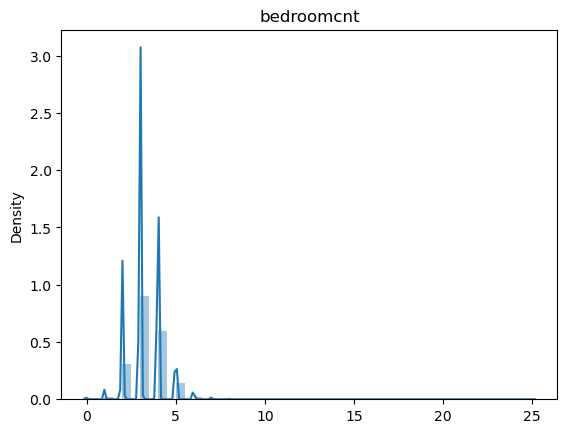

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1284/2989983864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=zillow[col])


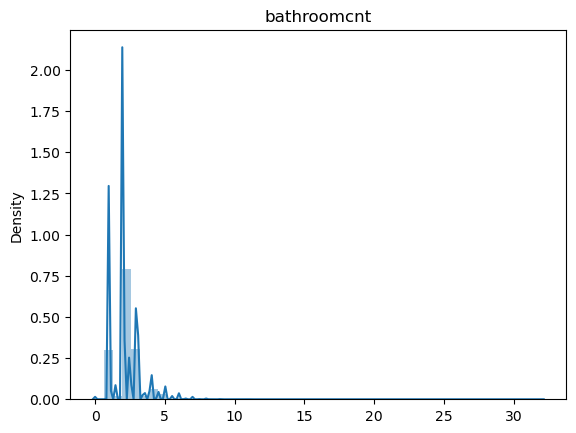

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1284/2989983864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=zillow[col])


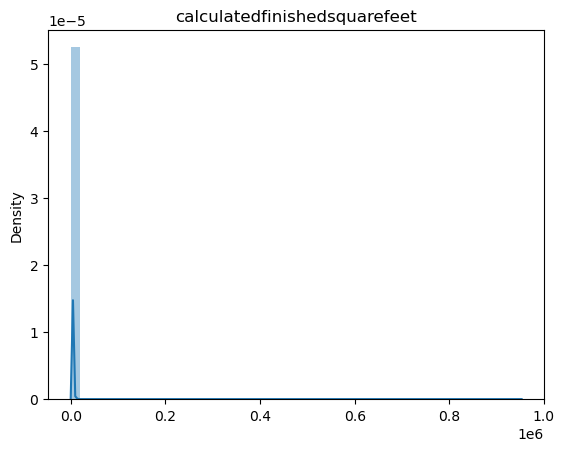

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1284/2989983864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=zillow[col])


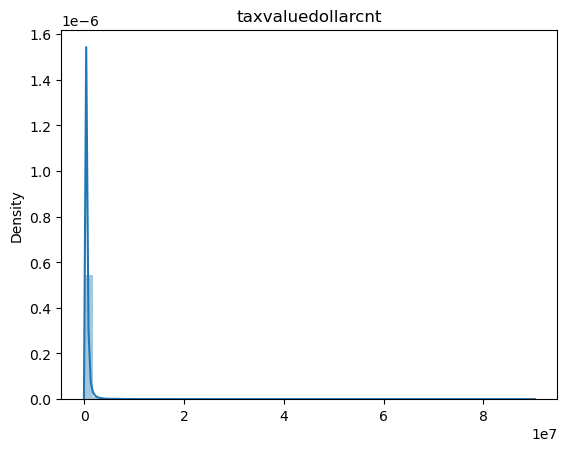

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1284/2989983864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=zillow[col])


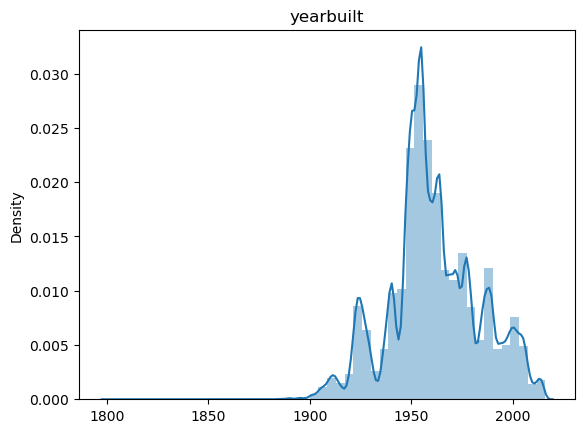

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1284/2989983864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=zillow[col])


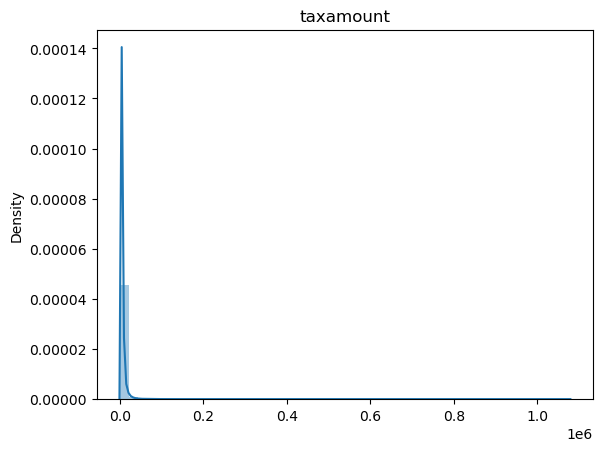

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1284/2989983864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=zillow[col])


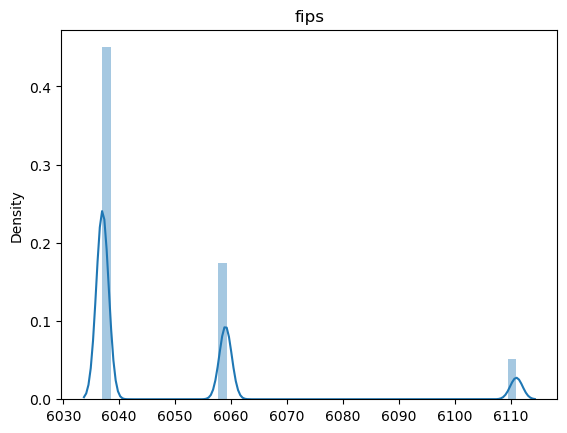

In [29]:
for col in zillow.columns:
    sns.distplot(x=zillow[col])
    plt.title(f'{col}')
    plt.show()

In [30]:
cols = zillow.columns
cols

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

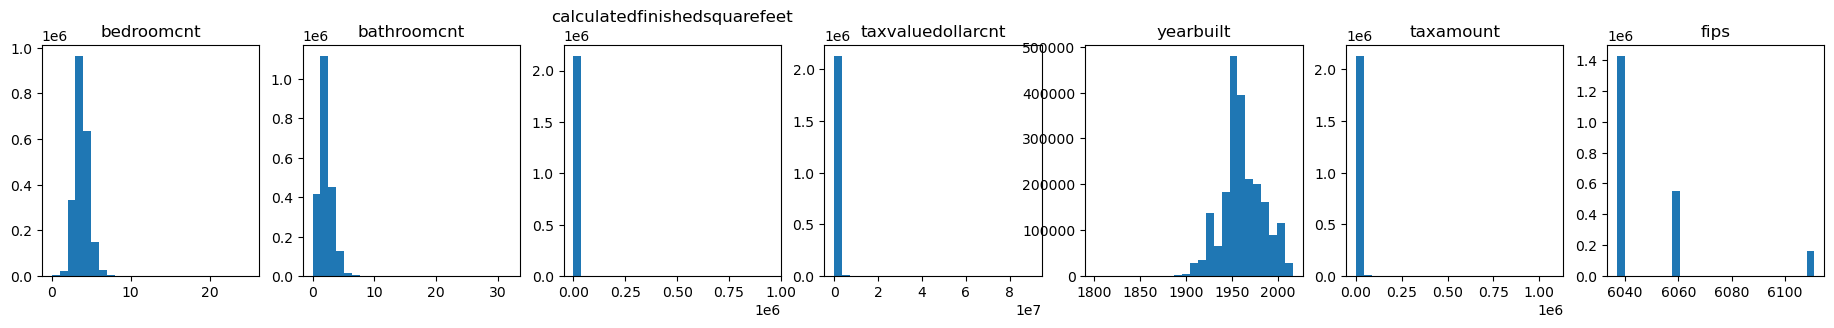

In [31]:
plt.figure(figsize=(23,3))

for i, col in enumerate(cols):
    
    plot_number = i + 1
    
    plt.subplot(1,7, plot_number)
    
    plt.title(col)
    
    zillow[col].hist(bins=25)
    
    plt.grid(False)

In [33]:
zillow = zillow.rename(columns = {'bedroomcnt': 'bedrooms',
                                 'bathroomcnt': 'bathrooms',
                                 'calculatedfinishedsquarefeet': 'sqft',
                                 'taxvaluedollarcnt': 'tax_value',
                                 'yearbuilt': 'year_built',
                                 'taxamount': 'tax_amount'})

In [34]:
zillow

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [35]:
zillow.drop_duplicates(inplace=True)

In [36]:
zillow

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0


In [ ]:
zillow = zillow.dropna()
zillow.drop_duplicates(inplace=True)

In [41]:
def split_data_label(df, stratify_col=None, target_col=None, test_size=.2, validate_size=.2):
    
    if stratify_col != None:
        train_validate, test = train_test_split(df, test_size = .2, random_state=823, stratify=df[stratify_col])
        train, validate = train_test_split(train_validate, test_size= validate_size / (1 - test_size), random_state=823, stratify=train_validate[stratify_col])
    
        X_train = train.drop(columns=[stratify_col])
        y_train = train[stratify_col]

        X_validate = validate.drop(columns=[stratify_col])
        y_validate = validate[stratify_col]

        X_test = test.drop(columns=[stratify_col])
        y_test = test[stratify_col]
        
    return X_train, y_train, X_validate, y_validate, X_test, y_test

    else:
        train_validate, test = train_test_split(df, test_size = .2, random_state=823)
        train, validate = train_test_split(train_validate, test_size= validate_size / (1 - test_size), random_state=823)
    
        X_train = train.drop(columns=[target_col])
        y_train = train[target_col]

        X_validate = validate.drop(columns=[target_col])
        y_validate = validate[target_col]

        X_test = test.drop(columns=[target_col])
        y_test = test[target_col]

    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [ ]:
def wrangle_zillow():
    zillow = acquire.get_zillow_data()
    zillow = zillow.dropna()
    zillow.drop_duplicates(inplace=True)